In [4]:
from prophet import Prophet       #loading libraries
import pandas as pd

df=pd.read_csv(r'C:\Users\dell\Downloads\Prophet_AQI 2(in)(in)(in)(in).csv')      # loading CSV file using pandas

df['ds']=pd.to_datetime(df['ds'])            # datetime value prophet requires. only this format works
df['y']=df['AQI']                           # renaming AQI to y . i didnt rename ds as it was already in my dataset.

model=Prophet()               # Initialize the Prophet forecasting model.
model.fit(df[['ds','y']])               # fitting df and y column

future=model.make_future_dataframe(periods=5)       #making future dataframe 5 days after the last date in my dataset
forecast=model.predict(future)           # for predicting future values for given number of days ( 5 in my case)

preds = forecast[['ds', 'yhat']].tail(5)           #to print last 5 values from my prophet dataset. those last 5 are predicted AQI
print("Predicted AQI values (21–25 Dec 2025):")
print(preds)                      #to print last 5 values in ds and y

23:34:42 - cmdstanpy - INFO - Chain [1] start processing
23:34:44 - cmdstanpy - INFO - Chain [1] done processing


Predicted AQI values (21–25 Dec 2025):
             ds        yhat
1085 2025-12-21  128.674946
1086 2025-12-22  133.060275
1087 2025-12-23  134.490727
1088 2025-12-24  133.694469
1089 2025-12-25  133.597531


In [5]:
#  forecast[['ds', 'yhat']]- selects column ds and yhat from new dataframe "forecast"

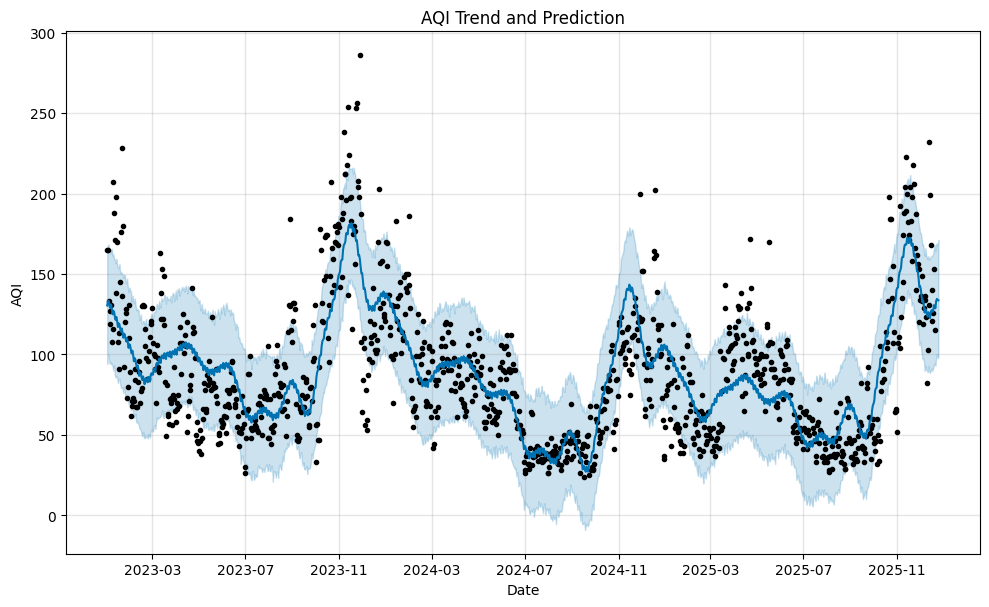

In [6]:
import matplotlib.pyplot as plt                       # for visualization

model.plot(forecast)                                  # generates a plot using forecast dataframe we created
plt.title('AQI Trend and Prediction')                    
plt.xlabel('Date')                                    # labelling x axis
plt.ylabel('AQI')                                     # labeling y axis
plt.show()                                            # to show the plot